## Business Problem
#### The xyz manufacturing company has provided us the dataset as records of different parameters while working on different types of products for one of its substractive manufacturing machine like drill,shaper or lathe.The dataset has records like surrounding air temp assuming it might be air cooled machine,the process temperature,rotational speed of the motor driving the tool,the torque induced and the tool wear rate.By this records the company wants to predict the failure of machine prior enough to avoid the breakdown of machine,production loss and batch production loss.The predictions will help the company to decide the action of maintenance on respective machine priorly on basis of prediction.
#### So we are building a model which would train on previous records of failures with other recorded parameters ,which will predict whether the machine is prone to fail on the running parameters or not.

#### Importing required libraries

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
pd.set_option('display.max_columns',100)

#### Reading dataset and getting overview

In [23]:
df=pd.read_csv(r'C:\Users\Admin\Desktop\machine failure dataset.csv')

In [24]:
df.shape

(10000, 14)

In [25]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

#### The columns TWF,HDF,PWF,OSF,RNF are the further classification or the reasons why machine failed,but since we are predicting the machine failure on other variables this columns/features are not useful as they are a part of the machine failure
#### Hence dropping those columns

In [27]:
df=df.drop(['TWF','HDF','PWF','OSF','RNF'],axis=1)

#### Checking for any null values:
#### Found no null values

In [28]:
df.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
dtype: int64

#### Checking for any duplicates:
#### No duplicates found

In [29]:
df.duplicated(keep=False).sum()

0

## EDA
#### Analysing the features

<AxesSubplot:xlabel='UDI', ylabel='Density'>

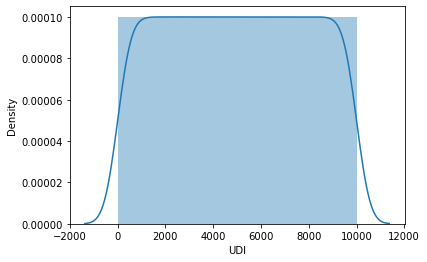

In [13]:
sns.distplot(df['UDI'])

#### While looking at dataset we can observe that UDI is just a unique identifier type column for all records in the datset,and hence we have validated the same by plotting a distplot which shows equally distributed against all unique values of UDI

In [30]:
df['Product ID'].value_counts()

L54524    1
L49692    1
M16790    1
L52322    1
M21511    1
         ..
M19484    1
H33443    1
L52030    1
L54631    1
L53988    1
Name: Product ID, Length: 10000, dtype: int64

In [20]:
sns.countplot(df['Product ID'])

#### The productID is also observed as an unique identifier for the proucts being manufactured on this machine,the count plot validates that ProductID is a unique identifier column

<AxesSubplot:xlabel='Type', ylabel='count'>

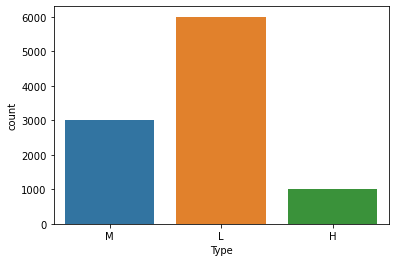

In [39]:
sns.countplot(df['Type'])

In [42]:
df['Type'].value_counts(normalize=True)*100

L    60.00
M    29.97
H    10.03
Name: Type, dtype: float64

In [66]:
pd.crosstab(df['Type'],df['Machine failure'],normalize=True)*100

Machine failure,0,1
Type,,
H,9.82,0.21
L,57.65,2.35
M,29.14,0.83


#### As we can see the distribution of type of products manufactured on this machine includes 60% low quality product types,30% Medium quality and 10% high quality type,the product qualty will definately affect the machine chance to fail assuming that the high quality products will lead to more wear of tool and other parts.
#### After checking in crosstab it is observed more failures were observed while working on low quality products ,hence our assumption is not right,this indicates that machine failure is not highly realed tot the product type

#### Checking the numerical variables

In [31]:
df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


<AxesSubplot:xlabel='Rotational speed [rpm]'>

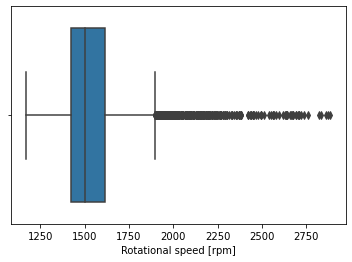

In [34]:
sns.boxplot(df['Rotational speed [rpm]'])

<AxesSubplot:xlabel='Torque [Nm]'>

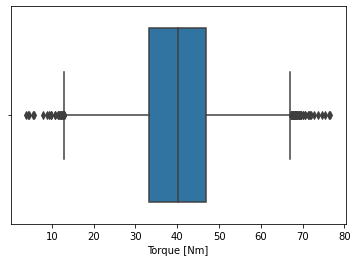

In [36]:
sns.boxplot(df['Torque [Nm]'])

<AxesSubplot:xlabel='Tool wear [min]'>

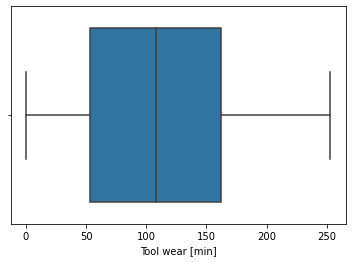

In [37]:
sns.boxplot(df['Tool wear [min]'])

#### While observing at the numerical variables we can find that variables of Toolwear,Process temp and air temp are having no outliers whereas variables of Rotational speed and torque are having outliers which can be seen in boxplot above

#### But since the high values in Rotational speed variable can play a major role in getting the insight of machine failure ,we are keeping the outliers as it is,same goes with the torque column which shows outliers on both ends ,which can affect the machine failure.Hence both variables are not treated for outliers

## Checking Correlation Among the features
#### Making a copy of dataset

In [58]:
df_new=df.copy()
df_new.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure
0,1,M14860,M,298.1,308.6,1551,42.8,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0


#### Converting the Type variable into numeric for checking correlation

In [59]:
from sklearn.preprocessing import LabelEncoder
lr = LabelEncoder()
df_new['Type']=lr.fit_transform(df_new['Type'])
df_new.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure
0,1,M14860,2,298.1,308.6,1551,42.8,0,0
1,2,L47181,1,298.2,308.7,1408,46.3,3,0
2,3,L47182,1,298.1,308.5,1498,49.4,5,0
3,4,L47183,1,298.2,308.6,1433,39.5,7,0
4,5,L47184,1,298.2,308.7,1408,40.0,9,0


<AxesSubplot:>

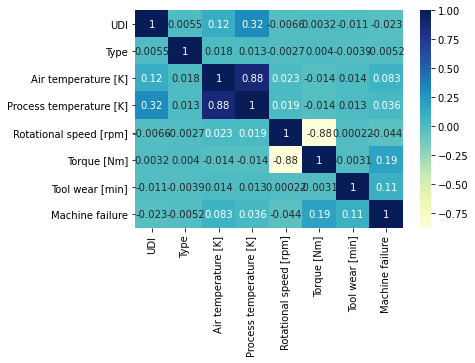

In [62]:
sns.heatmap(df_new.corr(), cmap="YlGnBu", annot=True)

#### The heatmap indicates that variables like process temp and air temp are highly positively correlated whereas rotational speed and torque are highly negatively corelated which can be understood as the more air temp the more wud be process temp as the surrounding cooling air is high in temp,also the torue is indirectly propeortional to speed which has lead to negative correlation.
#### But considering our target variable Machine failure no such dominantly positive or negative correlation found ,variables of toolwear and torque are showing some correlation with failure.Hence this indicates that machine failure is not dependent on only specific variables but cumulative on all variables ,hence all varaibles should be considered while model building.

## Converting categorical variable into numerical vraibels

In [69]:
df=pd.get_dummies(df)
df.head()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,Product ID_H29424,Product ID_H29425,Product ID_H29432,Product ID_H29434,Product ID_H29441,Product ID_H29452,Product ID_H29457,Product ID_H29462,Product ID_H29466,Product ID_H29481,Product ID_H29494,Product ID_H29500,Product ID_H29522,Product ID_H29525,Product ID_H29550,Product ID_H29552,Product ID_H29557,Product ID_H29560,Product ID_H29569,Product ID_H29571,Product ID_H29580,Product ID_H29581,Product ID_H29595,Product ID_H29606,Product ID_H29607,Product ID_H29610,Product ID_H29626,Product ID_H29635,Product ID_H29680,Product ID_H29682,Product ID_H29684,Product ID_H29691,Product ID_H29702,Product ID_H29707,Product ID_H29712,Product ID_H29716,Product ID_H29724,Product ID_H29734,Product ID_H29742,Product ID_H29743,Product ID_H29764,Product ID_H29767,Product ID_H29776,...,Product ID_M24711,Product ID_M24717,Product ID_M24719,Product ID_M24721,Product ID_M24722,Product ID_M24724,Product ID_M24725,Product ID_M24731,Product ID_M24734,Product ID_M24735,Product ID_M24739,Product ID_M24748,Product ID_M24753,Product ID_M24756,Product ID_M24761,Product ID_M24763,Product ID_M24765,Product ID_M24766,Product ID_M24767,Product ID_M24771,Product ID_M24775,Product ID_M24776,Product ID_M24777,Product ID_M24781,Product ID_M24783,Product ID_M24784,Product ID_M24785,Product ID_M24786,Product ID_M24788,Product ID_M24800,Product ID_M24803,Product ID_M24807,Product ID_M24809,Product ID_M24814,Product ID_M24815,Product ID_M24816,Product ID_M24818,Product ID_M24827,Product ID_M24835,Product ID_M24842,Product ID_M24846,Product ID_M24847,Product ID_M24849,Product ID_M24851,Product ID_M24855,Product ID_M24857,Product ID_M24859,Type_H,Type_L,Type_M
0,1,298.1,308.6,1551,42.8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,298.2,308.7,1408,46.3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,3,298.1,308.5,1498,49.4,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,4,298.2,308.6,1433,39.5,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,5,298.2,308.7,1408,40.0,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


## Model Building

#### splitting dataset into X as independent variable and Y as dependent variable

In [72]:
X=df.drop(['Machine failure'],axis=1)
Y=df['Machine failure']


#### splitting the X and Y set of dependent variable and independent variables into train and test data with 80:20 proportion,train data will be used to train the model ,test data will be used to validate the performance of model

In [73]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=123)

## Training model by using Logistic regression algotithm
#### Since our target varaible is non continuous and is of discrete having two categories ,logistic regression model can train our model in best way ,hence using logistic regression to train the model on X_train and Y_train dataset.

In [74]:
from sklearn.linear_model import LogisticRegression
Logr=LogisticRegression()
Logr.fit(X_train,Y_train)

LogisticRegression()

#### Predicting on the X_test which is 20% and we have the machine failure records of this set in Y_test

In [75]:
Y_pred=Logr.predict(X_test)
Y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

#### Validating the results of our model by comaring the Y_pred with Y_test

In [78]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(accuracy_score(Y_pred,Y_test))
confusion_matrix(Y_pred,Y_test)

0.964


array([[1919,   67],
       [   5,    9]], dtype=int64)

In [80]:
x=classification_report(Y_pred,Y_test)
print(x)

              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1986
           1       0.12      0.64      0.20        14

    accuracy                           0.96      2000
   macro avg       0.56      0.80      0.59      2000
weighted avg       0.99      0.96      0.98      2000

